In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_next_target(page,string_to_find):
    start_line = page.find(string_to_find)
    if start_line == -1:
        return None, 0
    start_quote = page.find('"', start_line)
    end_quote = page.find('"', start_quote + 1)
    line = page[start_quote + 1:end_quote]
    return line, end_quote

def get_all_lines(page,string_to_find,lines):
    while True:
        line, endpos = get_next_target(page,string_to_find)
        if line:
            lines.append(line.split())
            page = page[endpos:]
        else:
            break
    return lines


(20.31225, 769.1207499999999, 218.34044999999998, 160.51455)

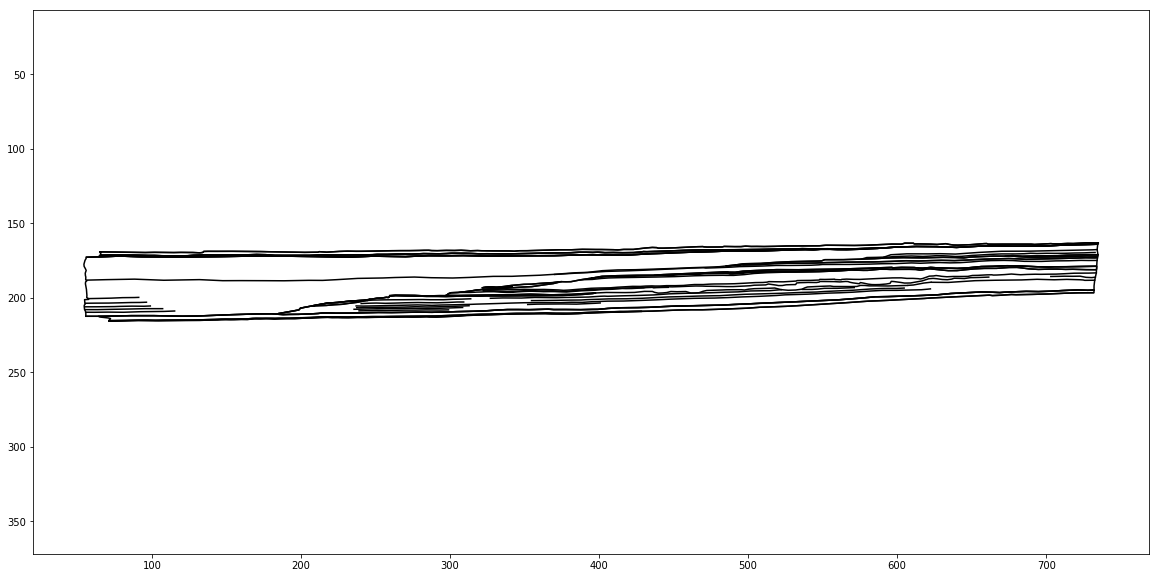

In [11]:
fname = 'torkeal1.svg'
f = open(fname)
t = f.read()
f.close()

lines=[]
get_all_lines(t,'points=',lines)

all_lines = []
for i in range(0,np.size(lines)):
    temp = np.zeros([np.size(lines[i]),2])
    for j in range(0,np.size(lines[i])):
        temp[j,0] = float(lines[i][j].split(',')[0])
        temp[j,1] = float(lines[i][j].split(',')[1])
    all_lines.append(temp)

fig1 = plt.figure(figsize=(20, 10))
for i in range(0,np.size(all_lines)):
    plt.plot(all_lines[i][:,0],all_lines[i][:,1],'k')
plt.gca().invert_yaxis()
plt.axis('equal')
